### 1. **Business Understanding**

#### Name	Attribute/Target	Description
**ID**	-N/A	-Unique number to represent patient ID

**PRG**	-Attribute1	-Plasma glucose

**PL**	-Attribute 2 -Blood Work Result-1 (mu U/ml)

**PR**	-Attribute 3 -Blood Pressure (mm Hg)

**SK**	-Attribute 4 -Blood Work Result-2 (mm)

**TS**	-Attribute 5 -Blood Work Result-3 (mu U/ml)

**M11**	-Attribute 6 -Body mass index (weight in kg/(height in m)^2)

**BD2**	-Attribute 7 -Blood Work Result-4 (mu U/ml)

**Age**	-Attribute 8 -patients age (years)

**Insurance** -N/A	-If a patient holds a valid insurance card

**Sepssis**	-Target	-Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

### 2. **Data Understanding**

In [96]:
# import the necessary libraries

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np  
import seaborn as sns
#import plotly.express as px  

In [6]:
# Load the test dataset
df_test = pd.read_csv("./data/Paitients_Files_Test.csv")
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [16]:
df_test.duplicated().sum()

0

In [17]:
df_test.isna().sum().sum()

0

In [19]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,169.0,3.917160,3.402415,0.0,1.000,3.000,6.000,13.000
PL,169.0,123.520710,29.259123,56.0,102.000,120.000,141.000,199.000
PR,169.0,70.426036,19.426805,0.0,62.000,74.000,80.000,114.000
SK,169.0,20.443787,15.764962,0.0,0.000,23.000,32.000,49.000
TS,169.0,81.000000,110.720852,0.0,0.000,0.000,135.000,540.000
M11,169.0,32.249704,7.444886,0.0,27.600,32.400,36.600,57.300
BD2,169.0,0.438876,0.306935,0.1,0.223,0.343,0.587,1.698
Age,169.0,33.065089,11.548110,21.0,24.000,28.000,42.000,70.000
Insurance,169.0,0.727811,0.446410,0.0,0.000,1.000,1.000,1.000


In [8]:
# Load the train dataset
df = pd.read_csv("./data/Paitients_Files_Train.csv")
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [11]:
df.duplicated().sum()

0

In [13]:
df.isna().sum().sum()

0

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


#### Univariate analysis

<Figure size 4000x3000 with 0 Axes>

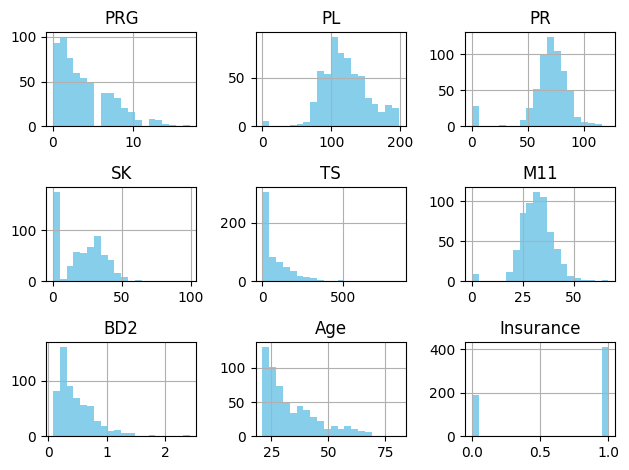

In [40]:
plt.figure(figsize=(40,30))
df.hist(color='skyblue',bins=20)
plt.tight_layout()
plt.show();

In [43]:
df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

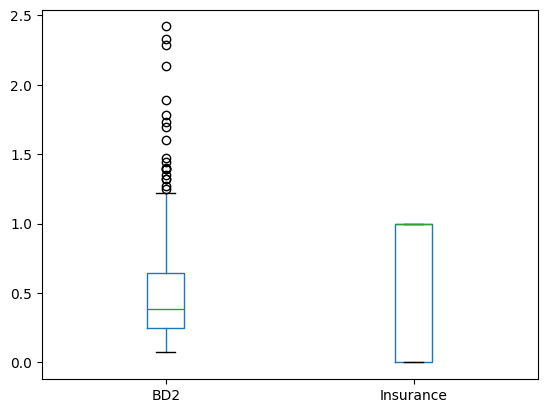

In [91]:
boxplot = df.boxplot(column=['BD2', 'Insurance'],grid=False)

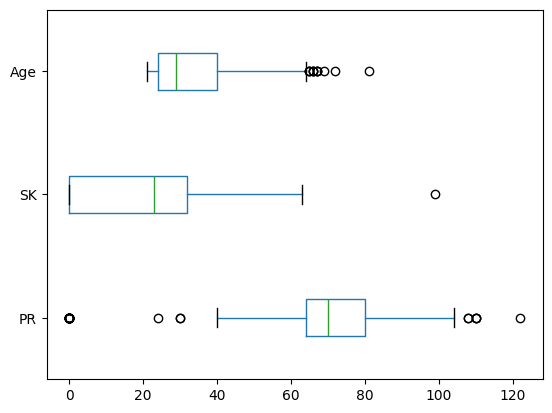

In [84]:
boxplot = df.boxplot(column=['PR', 'SK','Age'],vert=False,grid=False)

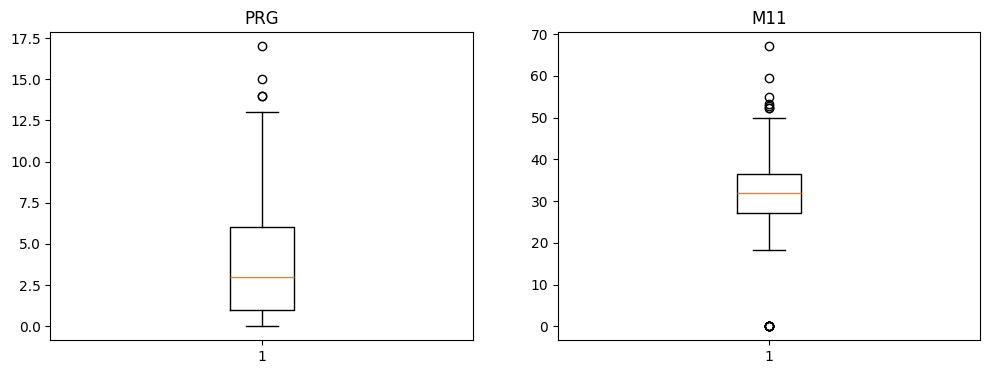

In [89]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Boxplot for 'PRG'
axs[0].boxplot(df['PRG'])
axs[0].set_title('PRG')

# Boxplot for 'M11'
axs[1].boxplot(df['M11'])
axs[1].set_title('M11')


plt.show()


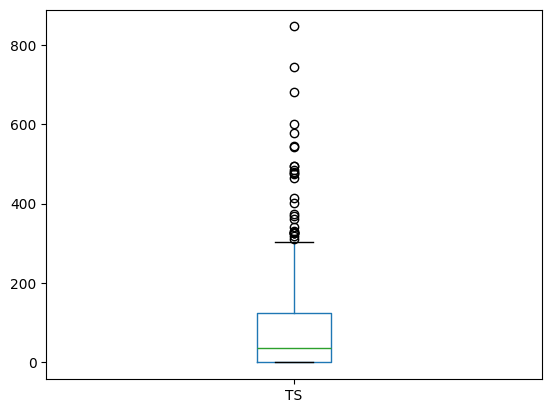

In [90]:
boxplot = df.boxplot(column=['TS'],grid=False)

#### Bivariate

In [93]:
data = df[['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis']]
df_corr =data.corr(numeric_only=True)
df_corr

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
PRG,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.084631
PL,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.050993
PR,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,-0.025365
SK,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,-0.017360
TS,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.041560
M11,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.026826
BD2,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.006114
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.054368
Insurance,0.084631,0.050993,-0.025365,-0.017360,0.041560,0.026826,0.006114,0.054368,1.000000


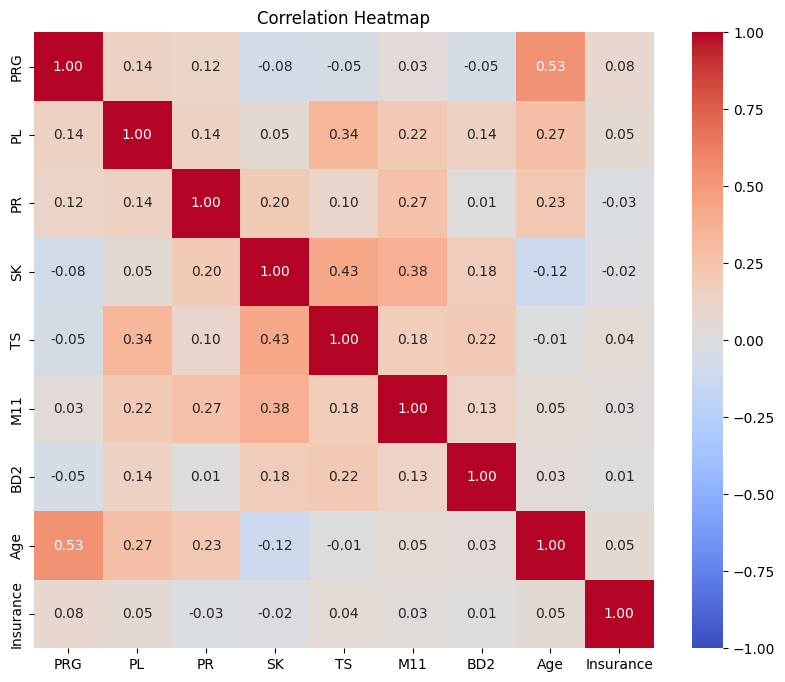

In [97]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

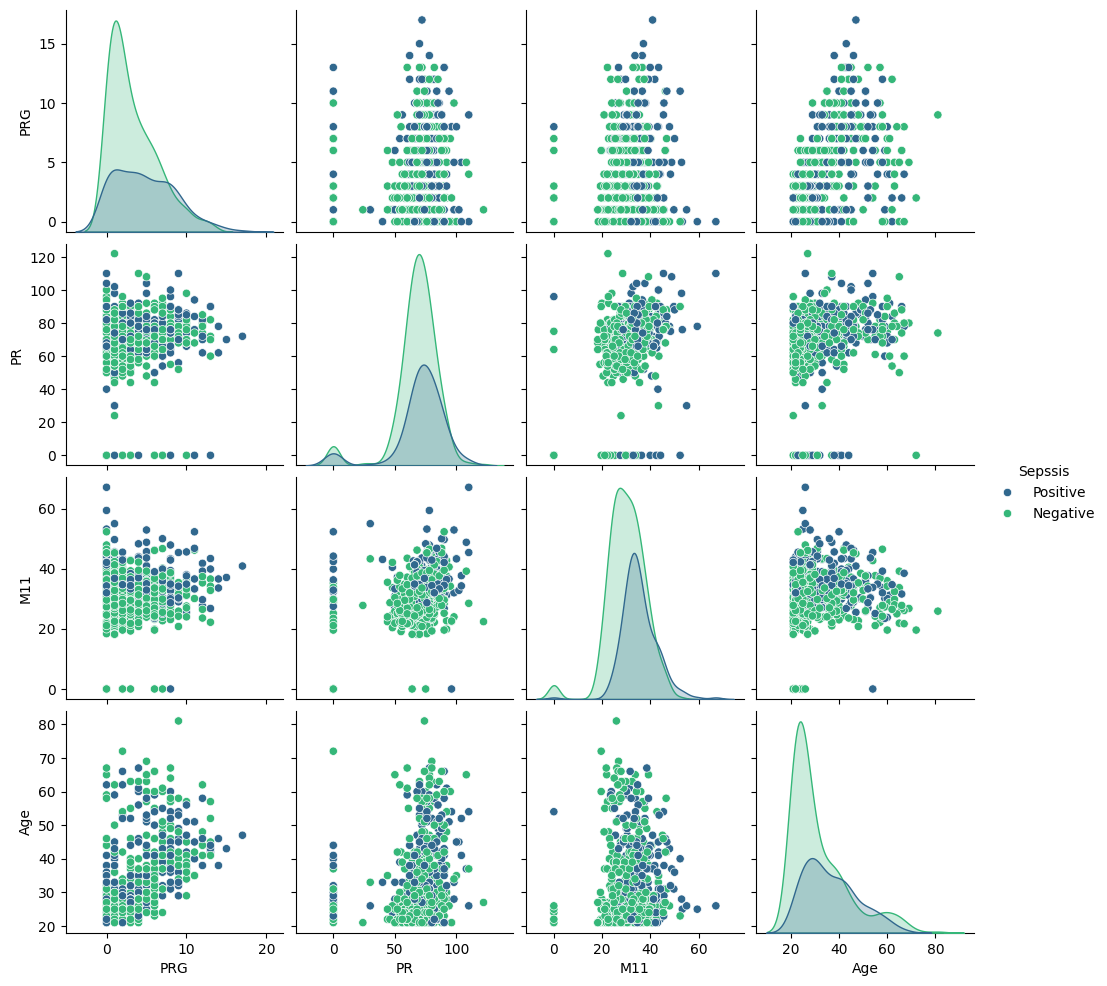

In [98]:
data = df[['PRG','PR','M11','Age', 'Sepssis']]
sns.pairplot(data=data,hue='Sepssis',palette='viridis',kind='scatter')
plt.show()

#### Insights
* Datasets do not have missing values
* Datasets do not have duplicated values
* Dataset does not have a normal distribution with some being skewed to the right
* Except for insurance all the data columns have outliers
* Most of the data is positively correlated with one another with only a few negative correlation like SK having a negative correlation of -0.12 with age, and PRG having a -0.08 correlation with SK.
* PRG has a poitive correlation of 0.53 with Age while SK a correlation of 0.43 with TS.